# This is a test 
## First code snippet
- It's a demonstration of a list
- it's also a loop 


In [ ]:
colorList = ['red','white','blue']
for color in colorList:
  print(color)


red
white
blue


## Second code snippet
- something a little more fun
- using requests


In [ ]:
import requests
import json

def getForecast(lat,long):
  headers = {
    'Accept': 'application/json'
  }
  # ============================================================
  #  url = 'https://api.weather.gov/points/lat,long'
  # ============================================================
  url = "https://api.weather.gov/points/" + lat + "," + long
  r = requests.get(url, headers=headers)

  if r.status_code == 200:
    locationDict = {}
    locationDict['city'] = r.json()['properties']['relativeLocation']['properties']['city']
    locationDict['state'] = r.json()['properties']['relativeLocation']['properties']['state']

    url = r.json()['properties']['forecast']
    r = requests.get(url, headers=headers)
    message = "The weather " + r.json()['properties']['periods'][0]['name'] + " in " + locationDict['city'] + ", " + locationDict['state'] + " is " + str(r.json()['properties']['periods'][0]['temperature'])
    message += " " + r.json()['properties']['periods'][0]['temperatureUnit'] + " and " + r.json()['properties']['periods'][0]['detailedForecast']
    print(message)
  else:
    print(str(r.status_code) + " " + url)

siteList = [ {'lat': '40.9036896','long':'-74.2403186'},{'lat': '41.053069','long':'-73.9746262'} ]
for site in siteList:
  getForecast(site['lat'],site['long'])



The weather Tonight in Totowa, NJ is 46 F and Areas of fog and a slight chance of rain. Mostly cloudy, with a low around 46. Northwest wind around 3 mph. Chance of precipitation is 20%.
The weather Tonight in Blauvelt, NY is 45 F and Areas of fog and a slight chance of rain. Mostly cloudy, with a low around 45. Northwest wind around 3 mph. Chance of precipitation is 20%.


## Graph it
- How do I add the times?

[46, 74, 50, 63, 49, 58, 41, 61, 39, 57, 37, 49, 40, 56]


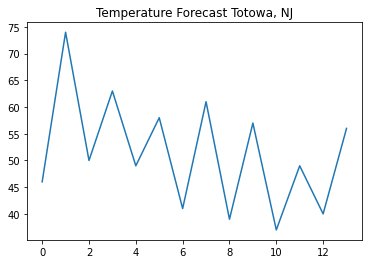

[45, 74, 49, 62, 49, 58, 41, 61, 39, 57, 37, 49, 40, 55]


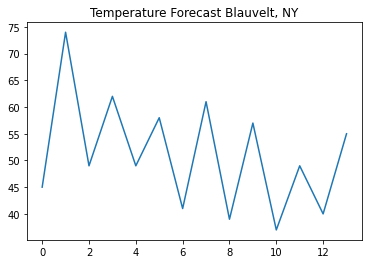

In [ ]:
import requests
import json
import numpy as np
from matplotlib import pyplot as plt

def getForecast(lat,long):
  headers = {
    'Accept': 'application/json'
  }
  # ============================================================
  #  url = 'https://api.weather.gov/points/lat,long'
  # ============================================================
  url = "https://api.weather.gov/points/" + lat + "," + long
  r = requests.get(url, headers=headers)
  # get the forecast link
  if r.status_code == 200:
    locationDict = {}
    locationDict['city'] = r.json()['properties']['relativeLocation']['properties']['city']
    locationDict['state'] = r.json()['properties']['relativeLocation']['properties']['state']

    # go to the forecast link
    url = r.json()['properties']['forecast']
    r = requests.get(url, headers=headers)

    # Add all of the temperatures to the list
    tempList = []
    for period in r.json()['properties']['periods']:
      tempList.append(period['temperature'])
    locationDict['tempList'] = tempList
    return locationDict
  else:
    print(str(r.status_code) + " " + url)

siteList = [ {'lat': '40.9036896','long':'-74.2403186'},{'lat': '41.053069','long':'-73.9746262'} ]
for site in siteList:
  locationDict = getForecast(site['lat'],site['long'])
  tempList=locationDict['tempList']
  print(tempList)
  x = [x for x in range(len(tempList))]
  plt.plot(x, tempList, '-')
  plt.title("Temperature Forecast " + locationDict['city'] + ", " + locationDict['state'])
  plt.show()